In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pandas.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20180527")

In [4]:
type(data)

list

In [5]:
data=data[0]

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"May 26, 2018",7486.48,7595.16,7349.12,7355.88,4051540000,127682000000
1,"May 25, 2018",7592.30,7659.14,7392.65,7480.14,4867830000,129470000000
2,"May 24, 2018",7561.12,7738.60,7331.14,7587.34,6049220000,128925000000
3,"May 23, 2018",8037.08,8054.66,7507.88,7557.82,6491120000,137024000000
4,"May 22, 2018",8419.87,8423.25,8004.58,8041.78,5137010000,143534000000


In [8]:
data.shape

(1855, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 7 columns):
Date          1855 non-null object
Open*         1855 non-null float64
High          1855 non-null float64
Low           1855 non-null float64
Close**       1855 non-null float64
Volume        1855 non-null object
Market Cap    1855 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 101.5+ KB


In [34]:
bitcoin=data.copy()

In [43]:
bitcoin.replace('-',0,inplace=True)

In [12]:
bitcoin.tail()

,Date,Open*,High,Low,Close**,Volume,Market Cap
1850,"May 02, 2013",116.38,125.60,92.28,105.21,0,1292190000
1851,"May 01, 2013",139.00,139.89,107.72,116.99,0,1542820000
1852,"Apr 30, 2013",144.00,146.93,134.05,139.00,0,1597780000
1853,"Apr 29, 2013",134.44,147.49,134.00,144.54,0,1491160000
1854,"Apr 28, 2013",135.30,135.98,132.10,134.21,0,1500520000


In [13]:
ethereum=pandas.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end=20180527")

In [14]:
ethereum=ethereum[0]
ethereum.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"May 26, 2018",587.43,606.17,583.51,587.28,1694300000,58546400000
1,"May 25, 2018",602.14,617.19,575.62,586.73,2110920000,60000400000
2,"May 24, 2018",584.54,610.82,557.21,601.75,2791100000,58234400000
3,"May 23, 2018",646.67,651.64,572.95,583.59,2995430000,64411000000
4,"May 22, 2018",700.18,700.98,644.03,647.74,2230470000,69726300000


In [15]:
ethereum.tail()

,Date,Open*,High,Low,Close**,Volume,Market Cap
1019,"Aug 11, 2015",0.708087,1.130000,0.663235,1.070000,1463100,42796500
1020,"Aug 10, 2015",0.713989,0.729854,0.636546,0.708448,405283,43130000
1021,"Aug 09, 2015",0.706136,0.879810,0.629191,0.701897,532170,42637600
1022,"Aug 08, 2015",2.790000,2.800000,0.714725,0.753325,674188,167911000
1023,"Aug 07, 2015",2.830000,3.540000,2.520000,2.770000,164329,-


In [16]:
ethereum.replace('-',0,inplace=True)

In [17]:
ethereum.tail()

,Date,Open*,High,Low,Close**,Volume,Market Cap
1019,"Aug 11, 2015",0.708087,1.130000,0.663235,1.070000,1463100,42796500
1020,"Aug 10, 2015",0.713989,0.729854,0.636546,0.708448,405283,43130000
1021,"Aug 09, 2015",0.706136,0.879810,0.629191,0.701897,532170,42637600
1022,"Aug 08, 2015",2.790000,2.800000,0.714725,0.753325,674188,167911000
1023,"Aug 07, 2015",2.830000,3.540000,2.520000,2.770000,164329,0


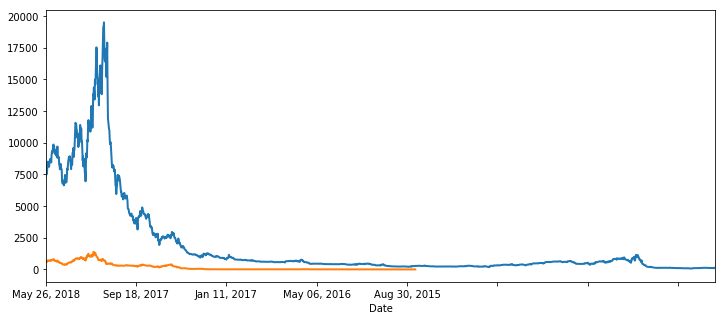

In [22]:
plt.figure(figsize=(12,5))
bitcoin.set_index('Date')["Close**"].plot(linewidth=2)
ethereum.set_index('Date')["Close**"].plot(linewidth=2)
plt.show()

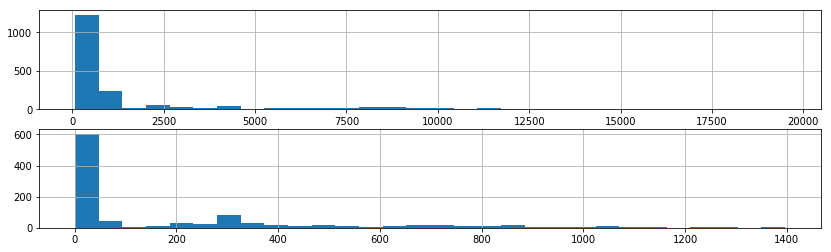

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(211)
bitcoin.set_index('Date')['Close**'].hist(bins=30)
plt.subplot(212)
ethereum.set_index('Date')['Close**'].hist(bins=30)
plt.show()

In [36]:
bitcoin=bitcoin.assign(Date=pandas.to_datetime(bitcoin.Date))
bitcoin.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2018-05-26,7486.48,7595.16,7349.12,7355.88,4051540000,127682000000
1,2018-05-25,7592.30,7659.14,7392.65,7480.14,4867830000,129470000000
2,2018-05-24,7561.12,7738.60,7331.14,7587.34,6049220000,128925000000
3,2018-05-23,8037.08,8054.66,7507.88,7557.82,6491120000,137024000000
4,2018-05-22,8419.87,8423.25,8004.58,8041.78,5137010000,143534000000


In [49]:
bitcoin.Volume=bitcoin.Volume.astype('int64')
bitcoin.describe()

,Open*,High,Low,Close**,Volume,Market Cap
count,1855.000000,1855.000000,1855.000000,1855.000000,1.855000e+03,1.855000e+03
mean,1852.583073,1918.142825,1779.349590,1856.198291,1.149293e+09,3.020785e+10
std,3303.042472,3441.480662,3133.550966,3304.862001,3.018150e+09,5.587985e+10
min,68.500000,74.560000,65.530000,68.430000,0.000000e+00,7.792550e+08
25%,284.035000,289.690000,280.370000,284.770000,1.717355e+07,4.036400e+09
50%,548.660000,573.380000,525.640000,549.260000,4.798010e+07,7.164770e+09
75%,1043.960000,1063.840000,1017.960000,1044.475000,2.254060e+08,1.673720e+10
max,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.261410e+11


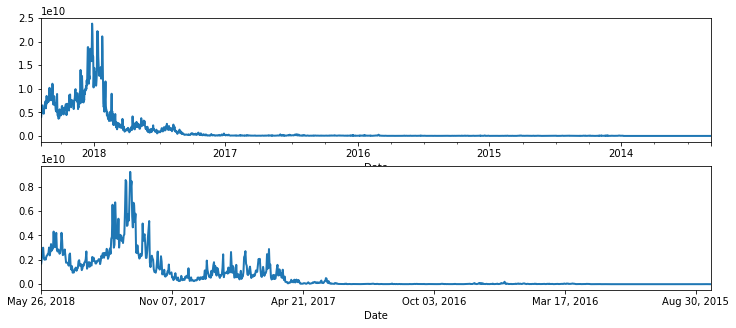

In [58]:
plt.figure(figsize=(12,5))
plt.subplot(211)
bitcoin.set_index('Date')["Volume"].plot(linewidth=2)
plt.subplot(212)
ethereum.set_index('Date')["Volume"].plot(linewidth=2)
plt.show()

In [59]:
bitcoin.to_csv('bitcoin.csv')
ethereum.to_csv('ethereum.csv')

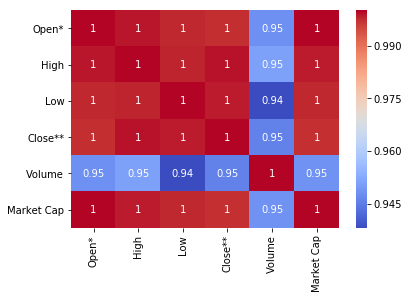

In [62]:
cor=bitcoin.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [63]:
cor

,Open*,High,Low,Close**,Volume,Market Cap
Open*,1.000000,0.998871,0.997964,0.997381,0.948240,0.999865
High,0.998871,1.000000,0.998092,0.999135,0.950996,0.998648
Low,0.997964,0.998092,1.000000,0.998701,0.938225,0.997947
Close**,0.997381,0.999135,0.998701,1.000000,0.946032,0.997230
Volume,0.948240,0.950996,0.938225,0.946032,1.000000,0.948378
Market Cap,0.999865,0.998648,0.997947,0.997230,0.948378,1.000000
